Defining Dummy Data

In [1]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[164 112]
 [104 280]
 [217 204]
 [ 95  77]
 [135  39]
 [ 60 132]
 [180 200]
 [142  13]
 [108 151]
 [101 125]
 [125 117]
 [ 89 110]
 [ 73  28]
 [139 185]
 [144 114]
 [ 79  33]
 [208 123]
 [102 261]
 [ 48  68]
 [ 24 334]
 [ 34 240]
 [ 71 185]
 [ 71  26]
 [ 47  59]
 [302 144]
 [ 83 138]
 [166  78]
 [139 125]
 [264 135]
 [198 124]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


After running this code, we will have a dataset (X) with discrete integer features and their corresponding labels (y).

Create Data Frame

In [2]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,164,112,0
1,104,280,0
2,217,204,0
3,95,77,0
4,135,39,0


After running this code, df will be a pandas DataFrame containing the processed features as columns 'Fitur 1' and 'Fitur 2', and the corresponding labels in the 'Label' column.

In [3]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,164,112,Kelas B
1,104,280,Kelas B
2,217,204,Kelas B
3,95,77,Kelas B
4,135,39,Kelas B


After running this code, df_label will be a new DataFrame where the numeric labels in the 'Label' column have been replaced with their human-readable equivalents ('Kelas A' and 'Kelas B'). This makes the DataFrame more interpretable and user-friendly for further analysis or visualization.

Data Visualization

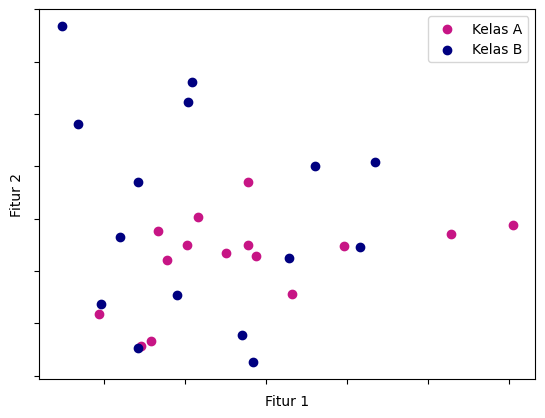

In [4]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

When the code is running, it will generate a scatter plot where data points from 'Kelas A' are shown in MediumVioletRed, and data points from 'Kelas B' are shown in Navy. The x and y axes represent 'Fitur 1' and 'Fitur 2', respectively, and the plot provides a visual separation of the two classes.

Multinomial Naive Bayes Classification

In [5]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.5555555555555556


This code demonstrates how to train a Multinomial Naive Bayes classifier on our dummy data, make predictions, and evaluate the model's accuracy on both the training and testing sets.

Gaussian Naive Bayes Classification

In [6]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7142857142857143
Hasil akurasi data test (Gaussian): 0.5555555555555556


This code demonstrates how to train a Gaussian Naive Bayes classifier on our dummy data, make predictions, and evaluate the model's accuracy on both the training and testing sets.